importing necessary libraries

In [60]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Reading Data

In [21]:
df = pd.read_csv("winequality-red.csv", sep = ";")

Explore the Data

In [22]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
df.shape

(1599, 12)

In [24]:
# check for missing values

df.isnull().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [25]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [26]:
# Check the values of the quality

df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

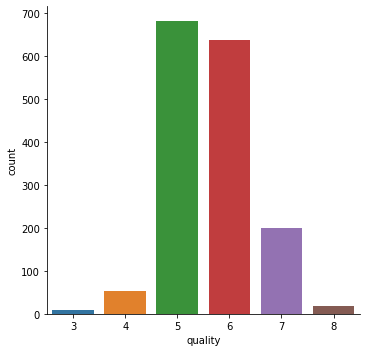

In [27]:
sns.catplot(x = "quality" , data = df, kind = "count")

####  Correlation Analysis 

In [28]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [29]:
correlation = df.corr()

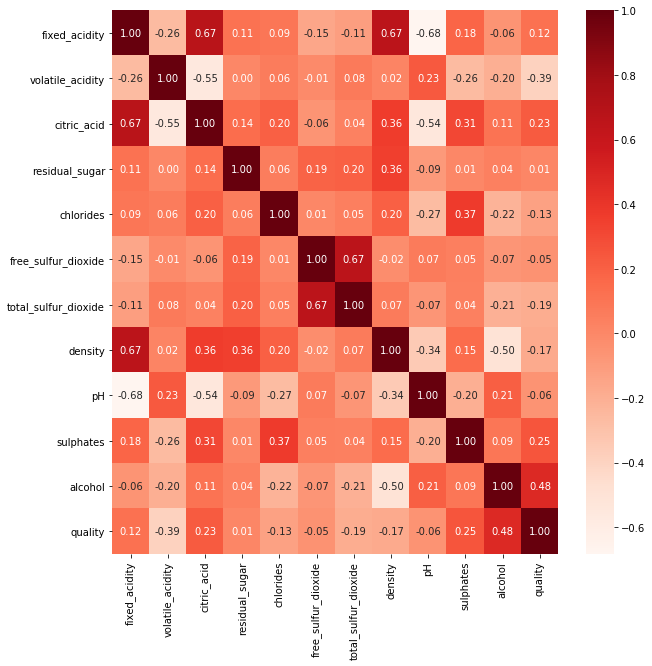

In [30]:
# Visulaize the correlation 

fig , ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlation , cbar = True, cmap = "Reds", annot = True, fmt = ".2f")

#### Data preprocessing 

In [38]:
# Separate the data into X & y

X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [39]:
X.shape

(1599, 11)

##### Binarizing the y values 

so we will convert all the values that <= 6 as 0 which refers to "bad quality", and convert the values that is > 6 to 1 which refers to "good quality 

In [40]:
y = df["quality"].apply(lambda y_value : 1 if y_value >=7 else 0)

In [50]:
sc = StandardScaler()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 5)

In [51]:
X_train[:10]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
870,7.7,0.715,0.01,2.1,0.064,31.0,43.0,0.99371,3.41,0.57,11.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1
780,7.0,0.570,0.00,2.0,0.190,12.0,45.0,0.99676,3.31,0.60,9.4
976,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4
384,7.7,0.510,0.28,2.1,0.087,23.0,54.0,0.99800,3.42,0.74,9.2
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0
1074,7.5,0.770,0.20,8.1,0.098,30.0,92.0,0.99892,3.20,0.58,9.2
1302,9.1,0.370,0.32,2.1,0.064,4.0,15.0,0.99576,3.30,0.80,11.2
796,8.7,0.460,0.31,2.5,0.126,24.0,64.0,0.99746,3.10,0.74,9.6


In [52]:
X_train = sc.fit_transform(X_train)

In [55]:
X_train[:10]

array([[-3.74039548e-01,  1.02781879e+00, -1.33450918e+00,
        -3.22069563e-01, -4.80436788e-01,  1.47838870e+00,
        -9.00604750e-02, -1.60049537e+00,  6.42365388e-01,
        -5.11997466e-01,  1.27559511e+00],
       [ 1.61124387e+00, -1.36843666e+00,  1.46533717e+00,
        -4.66251211e-01, -2.59422984e-01,  1.24874636e-01,
         4.28938971e-01,  6.51235792e-01, -9.61917458e-01,
        -4.54413509e-01, -5.97612921e-01],
       [-2.13243343e+00, -4.63646884e-02, -6.21821020e-01,
        -3.22069563e-01, -6.81358428e-01, -7.45241548e-01,
         5.81585866e-01, -1.76320788e+00,  3.78675977e+00,
        -5.69581423e-01,  2.49318033e+00],
       [-7.71096231e-01,  2.29066972e-01, -1.38541548e+00,
        -3.94160387e-01,  2.05117588e+00, -3.58523244e-01,
        -2.90017167e-02,  3.85759433e-04,  6.52249476e-04,
        -3.39245595e-01, -9.72254527e-01],
       [-6.57651465e-01, -6.52314341e-01,  1.41773441e-01,
        -3.22069563e-01, -9.86856718e-02,  1.86510700e+00,
  

In [56]:
X_test = sc.transform(X_test)

In [57]:
reg_model = LogisticRegression()

In [58]:
reg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred = reg_model.predict(X_test)

In [61]:
accuracy = accuracy_score(y_pred, y_test)

In [62]:
accuracy

0.86875